# Integralrechnung

## Lernziele
- Sie könnten unbestimmte Integrale (also Stammfunktionen) mit SymPy berechnen.
- Sie können bestimmte Integrale numerisch als Riemann-Summe berechnen.
- Sie können bestimmte Integrale mit Hilfe von Quadraturformeln berechnen.
- Sie können numerische Integration nutzen, um Anwendungsprobleme zu lösen.

## Imports

Führen Sie zunächst den folgenden Code aus, um die relevanten Bibliotheken einzubinden.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sympy import symbols, integrate, sin, cos, exp, init_printing

## Sybmolische Integration - unbestimmte Integrale
---
Wie Sie wissen, ist die Berechnung von Integralen im allgemeinen sehr schwierig. Im Gegensatz zur Berechnung von Ableitungen gibt es kein festes Schema, nach dem Sie vorgehen können. Daher ist es oft hilfreich, stattdessen auf Computer-Algebra-Systeme (CAS) zurückzugreifen, die Ihnen Integrale berechnen können.

In Python ist das am häufigsten verwendete CAS die Bibliothek SymPy. SymPy ist eine Python-Bibliothek für symbolische Mathematik. Im Gegensatz zu numerischen Bibliotheken wie NumPy oder SciPy, die mit konkreten Zahlen arbeiten, erlaubt SymPy das Rechnen mit mathematischen Ausdrücken in symbolischer Form – ähnlich wie man es auf Papier tun würde. Das bedeutet, man kann mit Variablen arbeiten, Ableitungen und Integrale exakt berechnen, Gleichungen lösen oder Terme vereinfachen. Für die Arbeit mit Integralen bietet SymPy eine einfache Möglichkeit, sowohl unbestimmte als auch bestimmte Integrale analytisch zu bestimmen. Dabei bleiben Ausdrücke wie ∫sin⁡(x) dx∫sin(x)dx exakt und werden nicht auf Näherungswerte reduziert.

Die Verwendung von SymPy beginnt typischerweise mit dem Import der Bibliothek und der Definition symbolischer Variablen, z. B. mit `x = symbols('x')`. Anschließend kann man mathematische Ausdrücke wie `sin(x)**2 + cos(x)**2` direkt eingeben und mit Funktionen wie `simplify, expand, diff` (für Ableitungen) oder `integrate` (für Integrale) weiterverarbeiten. SymPy bietet außerdem Werkzeuge zur Lösung von Gleichungen (`solve`), zur Umformung in verschiedene Darstellungen (z. B. Brüche, Wurzeln, Potenzen) und zur Darstellung mathematischer Ausdrücke in lesbarer Form – auch als LaTeX-Ausgabe.

Als ein erstes Beispiel berechnen wir symbolisch das Integral $\int x sin(x) dx$.

In [ ]:
x = symbols('x')
f = x*sin(x)
symbolic_integral = integrate(f, x)
init_printing(use_unicode=True)
print("Eine Stammfunktion von x*sin(x) ist:", symbolic_integral)


Eine Stammfunktion von x*sin(x) ist: x*exp(x)*sin(x)/2 - x*exp(x)*cos(x)/2 + exp(x)*cos(x)/2


Sie können selbstverständlich das unbestimmte Integral auch nutzen, um das bestimmte Integral zu berechnen.

In [23]:
a = 0
b = 2*np.pi
integral = integrate(f, (x, a, b))
print("Das Integral von x*sin(x) von 0 bis 2*pi ist:", integral)

Das Integral von x*sin(x) von 0 bis 2*pi ist: -6.28318530717959


### Übungsaufgabe: Symbolische Integration

Berechnen Sie mit Hilfe von SymPy das unbestimmte Integral der Funktion $f(x) = e^{2x} \cdot \cos(x)$, bei der Sie vermutlich wenig Motivation hätten, das Integral händisch zu bestimmen (obwohl das auch möglich wäre).

1. Definieren Sie die Funktion $f(x)$ symbolisch in Python.
2. Berechnen Sie das unbestimmte Integral $\int f(x)\,dx$ mit SymPy.
3. Geben Sie das Ergebnis in einer möglichst einfachen Form aus.
4. Berechnen Sie $\int_0^10 f(x)dx$.

*Hinweis:* Nutzen Sie die bereits importierten Funktionen und Variablen aus SymPy.

In [ ]:
# 1. Funktion symbolisch definieren
f_ex = exp(2*x) * cos(x)

# 2. Unbestimmtes Integral berechnen


# 3. Ergebnis ausgeben
print("Das unbestimmte Integral von e^{2x} * cos(x) ist:")

# 4. Bestimmtes Integral berechnen und ausgeben

exp(2*x)*sin(x)/5 + 2*exp(2*x)*cos(x)/5
Das unbestimmte Integral von e^{2x} * cos(x) ist:


## Numerische Integration
---
In der Praxis ist oft die Bestimmung einer Stammfunktion nicht möglich (weil beispielsweise die Funktion gar nicht analytisch bekannt ist) oder nicht nötig. Dann wird das bestimmte Integral numerisch berechnet. Die einfachst Form kennen Sie schon aus der Definition des Integrals über Riemann-Summen: das Integral wird als Summe über Rechtecke angenähert.

### Integrale als Riemann-Summe

Das bestimmte Integral einer Funktion  kann durch eine Summe von Rechtecken angenähert werden: $\int_a^b f(x) dx\approx \sum_{i=1}^n f(x_i)\cdot dx$, wobei $dx = (b-a)/n$ die Breite der Rechtecke und $x_i = a + i\cdot dx$ der linke Rand des i-ten Rechtecks ist.
Schreiben Sie eine Funktion `integral`, die das bestimmte Integral einer Funktion $f$ bei gegebenem $a$, $b$ und $n$ berechnet.

In [8]:
def integral(f, a, b, n_steps):
    # TODO
    return 0

Testen Sie Ihre Funktion mit dem folgenden Code, der das numerische berechnete Integral mit dem exakten Wert vergleicht. Variieren Sie die Anzahl an Intervallen $n$. Ab welcher Intervallzahl $n$ erhalten Sie ein brauchbares Ergebnis?

In [9]:
f = lambda x: x**3  # Die zu integrierende Funktion f
F = lambda x: 1 / 4 * x**4  # Eine Stammfunktion von f

# Anzahl an Schritten:
n = 100

# Integrationsgrenzen
a = 0
b = 1

# Ausgabe
print("Exaktes Integral:", F(b) - F(a))
print("Numerisch berechnet:", integral(f, a, b, n))

Exaktes Integral: 0.25
Numerisch berechnet: 0


### Berechnung von $\pi$

Der Rand eines Kreises mit Radius $1$ ist beschrieben durch die Menge an Punkten $(x,y)$, für die gilt $x^2 + y^2 = 1$. Im rechten oberen Quadrant kann die Formel eindeutig nach $y$ aufgelöst werden: $y=\sqrt{1-x^2}$. Damit kann die Fläche des rechten oberen Quadranten berechnet werden als $\int_0^1 \sqrt{1-x^2}dx$.

Die Fläche eines Kreises mit Radius $1$ ist $\pi$, die Fläche des rechten oberen Quadranten ist ein Viertel der Kreisfläche: $\frac 14 \pi$. Damit kann $\pi$ über die numerische Integration berechnet werden: $\pi = \int_0^1 4\sqrt{1-x^2} dx$.

Nutzen Sie diese Formel, um durch numerische Integration eine gute Näherung für $\pi$ zu berechnen. 

Plotten Sie die Differenz zwischen dem berechneten Wert und dem tatsächlichen Wert von $pi$ als Funktion der Anzahl an Schritten.

In [10]:
# Funktion um pi als Funktion der Schrittanzahl zu berechnen.
def compute_pi(n_steps):
    # TODO
    return 3  # exakt genug?


# TODO: plotte die Differenz pi - compute_pi(n) als Funktion von n

### Numerische Integration - Quadraturformeln
Genauere Ergebnisse als die Riemann-Summen liefert die Annäherung durch eine lineare Funktion oder - noch besser - die 3-Punkt-Simpson-Formel. Implementieren sie hier die drei Formeln:

In [11]:
# Integral über Rechtecke
def integral_box(f, a, b, n):
    # TODO
    return 0


# Integral mit linearer Näherung
def integral_linear(f, a, b, n):
    # TODO
    return 0


# Integral mit 3-Punkt-Simpson Regel
def integral_simpson(f, a, b, n):
    # TODO
    return 0



Betrachten Sie für diese Aufgabe die Funktion $f(x)=e^{-x^2/5}\cdot (x^4-5x^2)$. Diese Funktion kann nicht analytisch integriert werden, das heißt Sie können keine Kombination der Grundfunktionen finden, die dieses Integral berechnet. Aber numerisch kann das bestimmte Integral selbstverständlich ausgerechnet werden.

Nutzen Sie die drei im vorhergehenden Abschnitt definierten Integrationsverfahren, um  das Integral $\int_{-4}^8 f(x) dx$ zu berechnen. Vergleichen Sie die Ergebnisse für eine unterschiedliche Anzahl an Integrationsstellen.

Verlgeich der Näherungenfür n = 10
Exakte Lösung: 17.084768233757988
Rechteckregel: 0 Fehler: 17.084768233757988
Lineare Näherung: 0 Fehler: 17.084768233757988
Simpson-Regel: 0 Fehler: 17.084768233757988


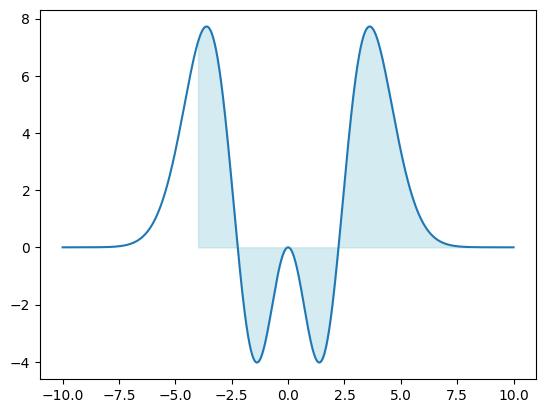

In [12]:
f = lambda x: (-5*x**2 + x**4)*np.exp(-.2*x**2)
a = -4
b = 8

x = np.linspace(-10,10,1000)
plt.plot(x, f(x))
plt.fill_between(x, f(x), where=(x >= a) & (x <= b), color='lightblue', alpha=0.5)


# Ergebnisse berechnen und ausgeben
n = 10
exact_value = scipy.integrate.quad(f, a, b)[0]
box_value = integral_box(f, a, b, n)
linear_value = integral_linear(f, a, b, n)
simpson_value = integral_simpson(f, a, b, n)

print("Verlgeich der Näherungenfür n =", n)
print("Exakte Lösung:", exact_value)
print("Rechteckregel:", box_value, "Fehler:", abs(box_value - exact_value))
print("Lineare Näherung:", linear_value, "Fehler:", abs(linear_value - exact_value))
print("Simpson-Regel:", simpson_value, "Fehler:", abs(simpson_value - exact_value))


Implementieren Sie drei Funktionen, um die das Integral numerisch zu berechnen: Sie nehmen  den linken Funktionswert und nähern die Fläche durch ein Rechteck, die Annäherung durch eine lineare Funktion und die 3-Punkt-Simpson-Formel. Vergleichen Sie die Ergebnisse für eine Unterschiedliche Anzahl an Integrationsintervallen n.

Zum Vergleich wird die numerische Integration mit scipy.integrate.quad genutzt, die eine numerische Integration bereitstellt. Ab welchem n weicht der von Ihnen berechnete Wert weniger als 0,01 vom tatsächlichen Wert ab?

## Anwendungsaufgabe

### Blutdruck-Medikament
Durch die Einnahme eines Medikaments zur Regulierung des Blutdrucks gelangen Wirkstoffe ins Blut. Die Wirkstoffmenge im Blut kann näherungsweise durch eine Funktion m beschrieben werden, deren 1. Ableitung bekannt ist:  
$m'(t)= 1,2\cdot e^{-0,04t}  - 0,1$ mit $t \geq 0$  
$t$: Zeit in min  
$m'(t)$:  momentane Änderungsrate der Wirkstoffmenge im Blut zur Zeit t in mg/min

Zum Zeitpunkt $t = 0$ beträgt die Wirkstoffmenge im Blut 10 mg.
1. Erstellen Sie eine Gleichung der Funktion m.
2. Berechnen Sie, nach welcher Zeit der Wirkstoff vollständig abgebaut ist.
Anmerkung: Die Lösung der entsprechenden Gleichung kann nur näherungsweise berechnet werden, nutzen Sie hierfür bspw. das Newton-Verfahren.

Quelle dieser Aufgabe: [Mathematik macht Freude](https://mmf.univie.ac.at/) (Datenquelle: Bundesministerium für Bildung, Wissenschaft und Forschung, Lizenz Creative Commons BY 4.0)

Tipp: machen Sie sich mit der Funktion `scipy.integrate.quad` vertraut.

In [13]:
# TODO